# GAMASI: Generic Asynchronous Multi-Agent Simulation Invoker

## Running simulation

In [2]:
import numpy as np

from src.Lab import Lab

lab = Lab()

In [3]:
simulation = lab.experiment(
    height=80, width=200,
    initial_population_count=100,
    max_total_duration=30, max_simulation_duration=6
)

Generating universe...	: Done in 0.245 s


Running simulation	: 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


Interrupting population	: 2467...
			| 342...
Simulation succeed...	: Returning data... Done in 8.724 s


## Analysis

### Statistics

#### Gathering & computing

In [4]:
data = lab.gather_data(simulation)

Gathering timelines		: 100%|██████████| 2820/2820 [00:00<00:00, 3541298.59it/s]


In [5]:
data["agents_statistics"]

,generation,parents_count,dead,lifespan,children_count,birth_success,travelled_distance,actions_count,min_decision_duration,max_decision_duration,...,min_action_duration,max_action_duration,mean_action_duration,median_action_duration,std_action_duration,min_round_duration,max_round_duration,mean_round_duration,median_round_duration,std_round_duration
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,True,225872251,1,True,17,23,16571.0,59241.0,...,1463.0,162506753.0,7.074361e+06,9929.0,3.388307e+07,188474.0,164907154.0,1.011450e+07,2110947.0,3.464197e+07
1,0,1,True,102365775,1,True,17,24,22492.0,134062.0,...,1012.0,56818785.0,2.378091e+06,10124.0,1.159582e+07,176622.0,57046282.0,4.442427e+06,2248776.0,1.161462e+07
2,0,1,True,211229362,1,True,14,17,20448.0,52348.0,...,1493.0,140968464.0,8.301266e+06,9247.0,3.418755e+07,211808.0,143352315.0,1.299788e+07,3104470.0,3.493177e+07
3,0,1,True,216115905,1,True,19,26,11452.0,58339.0,...,972.0,144644393.0,5.571251e+06,8310.5,2.836547e+07,193945.0,149839587.0,8.514892e+06,2210655.0,2.958064e+07
4,0,1,True,340424780,1,True,28,43,10469.0,51356.0,...,541.0,192561628.0,4.485598e+06,7634.0,2.936421e+07,195698.0,194512334.0,8.021035e+06,2335148.5,2.982152e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,9,1,False,140660656,0,True,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2816,8,1,False,130353695,0,True,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,7,1,False,106499234,0,True,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data["population_statistics"]

,min,max,mean,median,std
data,,,,,
lifespan,9738,8451071979,4.121582e+09,4.458169e+09,2.535281e+09
children_count,0,12,9.645390e-01,0.000000e+00,1.458234e+00
birth_success,False,True,9.985816e-01,1.000000e+00,3.764213e-02
travelled_distance,-1,182,7.001064e+00,3.000000e+00,1.147072e+01
actions_count,0,437,8.225213e+01,6.400000e+01,7.103454e+01
mean_decision_duration,12333.133333,147981648.375,1.887727e+06,1.785028e+04,1.045314e+07
mean_action_duration,778.75,237419275.666667,1.605272e+06,4.816139e+04,6.004815e+06
mean_round_duration,693375.75,460429479.5,6.058584e+07,5.692475e+07,3.830628e+07


#### Plotting some stats

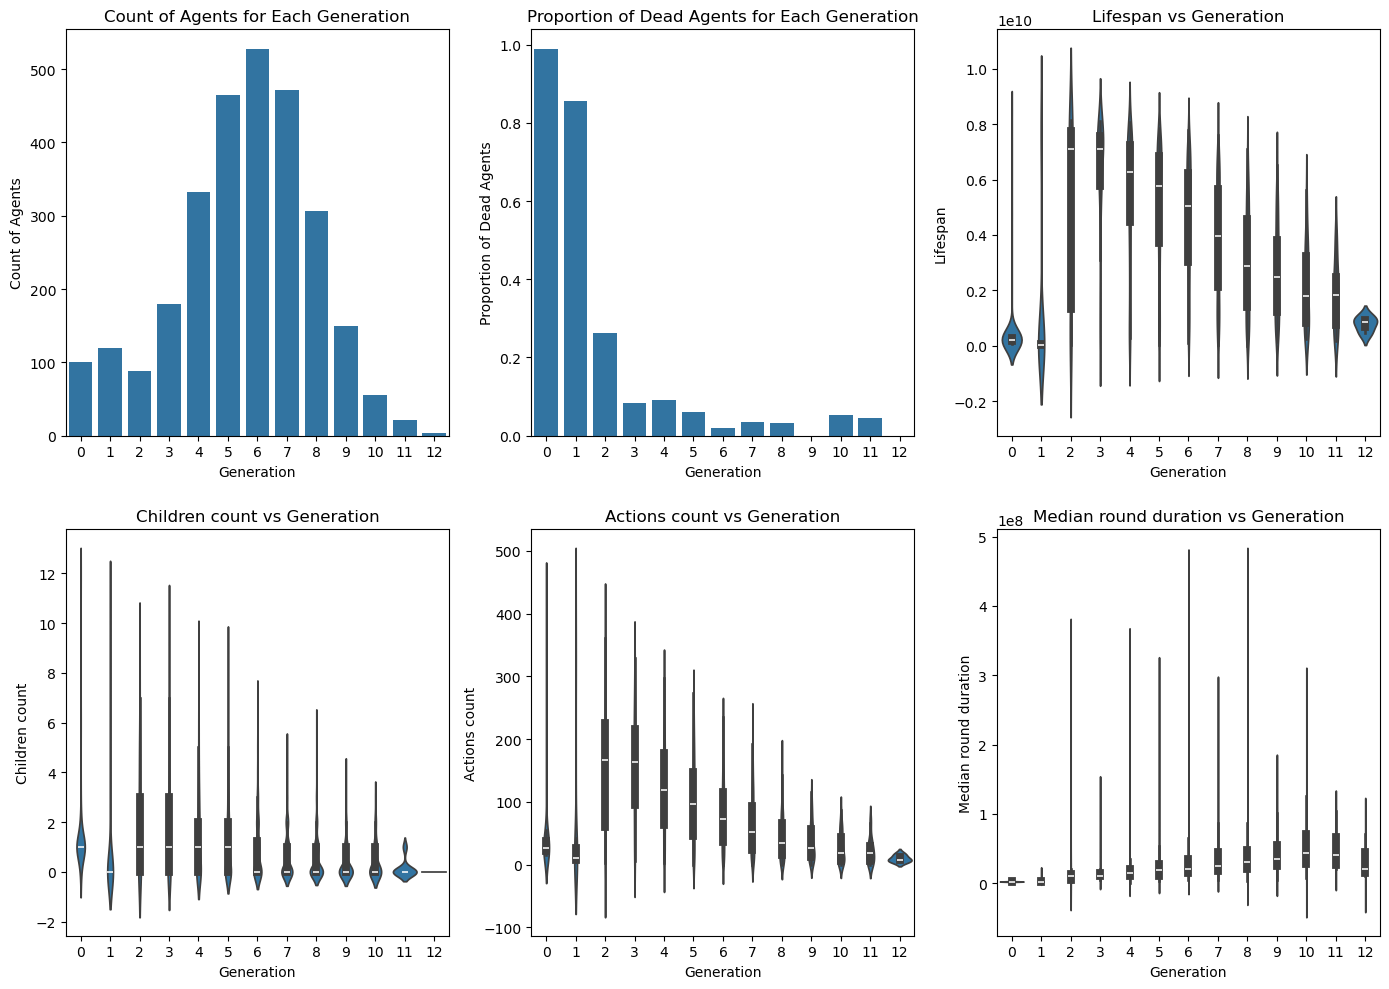

In [7]:
lab.plot_generation_stats(data)

### Timelines

#### Population count

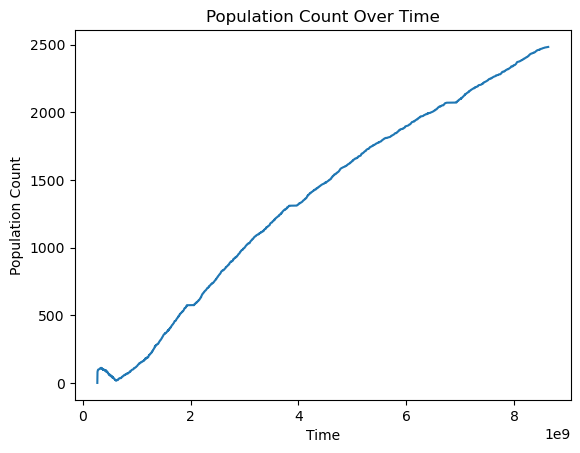

In [8]:
from matplotlib import pyplot as plt  # TODO Move to Lab
data["population_timeline"].plot(y="population_count", legend=False)
plt.title('Population Count Over Time')
plt.xlabel('Time')
plt.ylabel('Population Count')
plt.show()

#### Spatial evolution

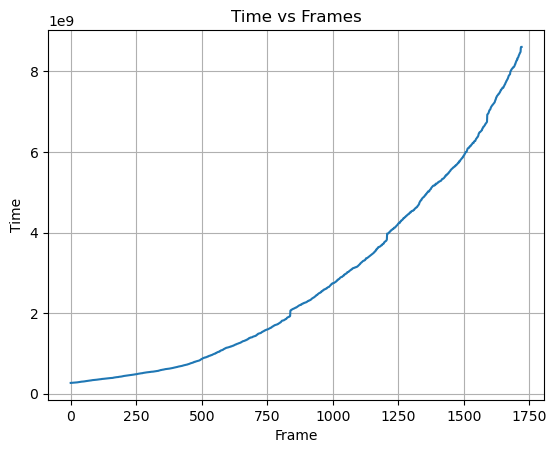

1721


In [9]:
import matplotlib.pyplot as plt

positions = data["positions"][0]

plt.plot(range(len(positions)), positions)
plt.xlabel('Frame')
plt.ylabel('Time')
plt.title('Time vs Frames')
plt.grid(True)
plt.show()
print(len(data["positions"][1]))

In [10]:
import imageio
from IPython.display import HTML

gif_path = "results/output.gif"
imageio.mimsave('results/output.gif', data["positions"][1], duration=0.01, loop=0)
width = 1000

# Generate HTML to display the GIF with specified width and interpolation
html_code = f'<img src="{gif_path}" width="{width}" style="image-rendering: pixelated;">'
HTML(html_code)

In [11]:
import numpy as np
import tifffile

# Assuming 'stack' is your array containing 2D numpy arrays
# 'stack' should be a list or array of 2D numpy arrays

# Convert the list of 2D arrays into a 3D numpy array
stack_3d = np.stack(data["positions"][1], axis=0)

# Save the stack as a TIFF file
tifffile.imsave('results/stack.tif', stack_3d)

/tmp/ipykernel_41636/1971774578.py:11: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('results/stack.tif', stack_3d)


#### Actions

In [12]:
# TODO